In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KDTree
from retrieve import getvector
import glob
import pickle
import time
from newinput import getarray

/home/sharat910/learn/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Helper Functions

In [2]:
def dumptree(tree):
    f = open("bigtree.pickle","w")
    s = pickle.dump(tree,f)
    f.close()

In [3]:
def undumptree():
    f = open("bigtree.pickle","r")
    tree = pickle.load(f)
    f.close()
    return tree

In [4]:
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dic = cPickle.load(fo)
    fo.close()
    return dic

In [5]:
def view_images(images):

	fig = plt.figure(figsize=(30, 10))

	subplotno=250
	for one_image in images:
		subplotno=subplotno+1
		#one_image = images[img_cnt]



		image_matrix=[]
		for i in range(0,1024):
			temp=[]
			temp.append(one_image[i])
			temp.append(one_image[i+1024])
			temp.append(one_image[i+2*1024])
			image_matrix.append(temp)

		j=0
		farray=[]
		while j<1023:
			array=[]
			for i in range(0, 32):
				array.append(image_matrix[j])
				j=j+1
			farray.append(array)

		ax = fig.add_subplot(subplotno)
		plt.imshow(farray)


	plt.show()


## Building the dataset

In [6]:
def get_train_images():
    filelist = ['cifar-10-batches-py/data_batch_4', 'cifar-10-batches-py/data_batch_5', 'cifar-10-batches-py/data_batch_3', 'cifar-10-batches-py/data_batch_2', 'cifar-10-batches-py/data_batch_1']
    images = []    
    for f in filelist:
        images += list(unpickle(f)['data'])
    return images

In [7]:
def get_test_images():
    filelist = glob.glob("cifar-10-batches-py/t*")
    f = filelist[0]
    return list(unpickle(f)['data'])

In [8]:
def build(images):
    vectors = [getvector(image)[0][0] for image in images]
    print "here"    
    tree = KDTree(vectors, leaf_size=10) 
    dumptree(tree)

In [9]:
tree = undumptree() 

In [10]:
def query(image,k=5):
    print "Query Image"
    view_images(image)
    vector = getvector(image)[0][0]                 
    distances, indices = tree.query(vector.reshape(1, -1), k)
    print distances
    retrieved_images = [trainimages[i] for i in indices[0]]
    print "Query Results"
    view_images(retrieved_images)    

In [11]:
trainimages = get_train_images()

In [12]:
#build(trainimages)

In [13]:
testimages = get_test_images()

Query Image


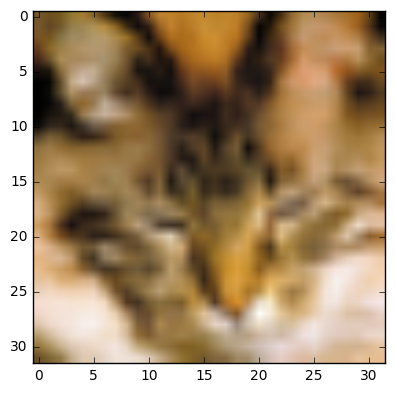

[[  3.33965159e-06   2.32660685e+00   2.33901354e+00   2.38126821e+00
    2.48280501e+00]]
Query Results


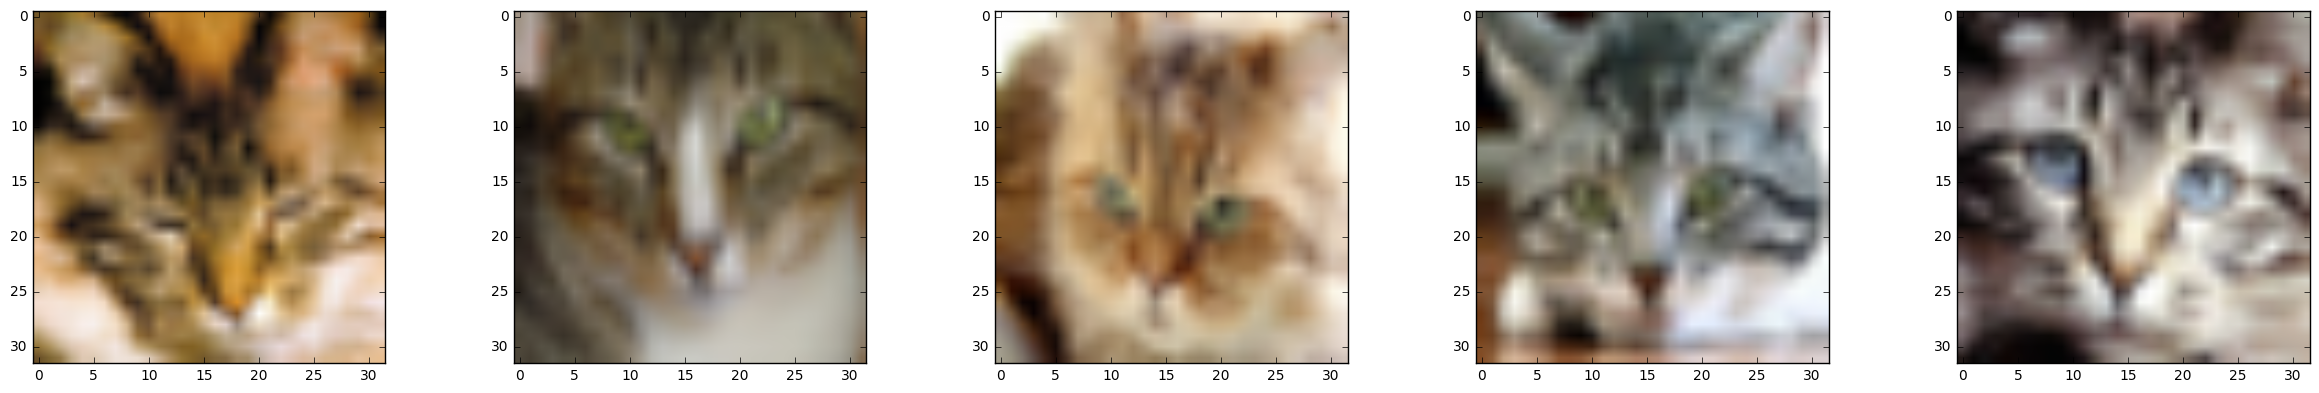

In [16]:
query([trainimages[476]])

Query Image


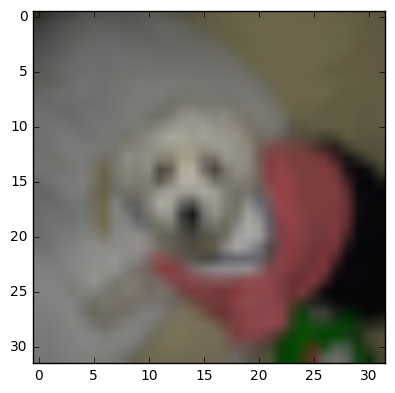

[[ 2.8432476   2.86870374  2.91801881  3.00835104  3.07677074]]
Query Results


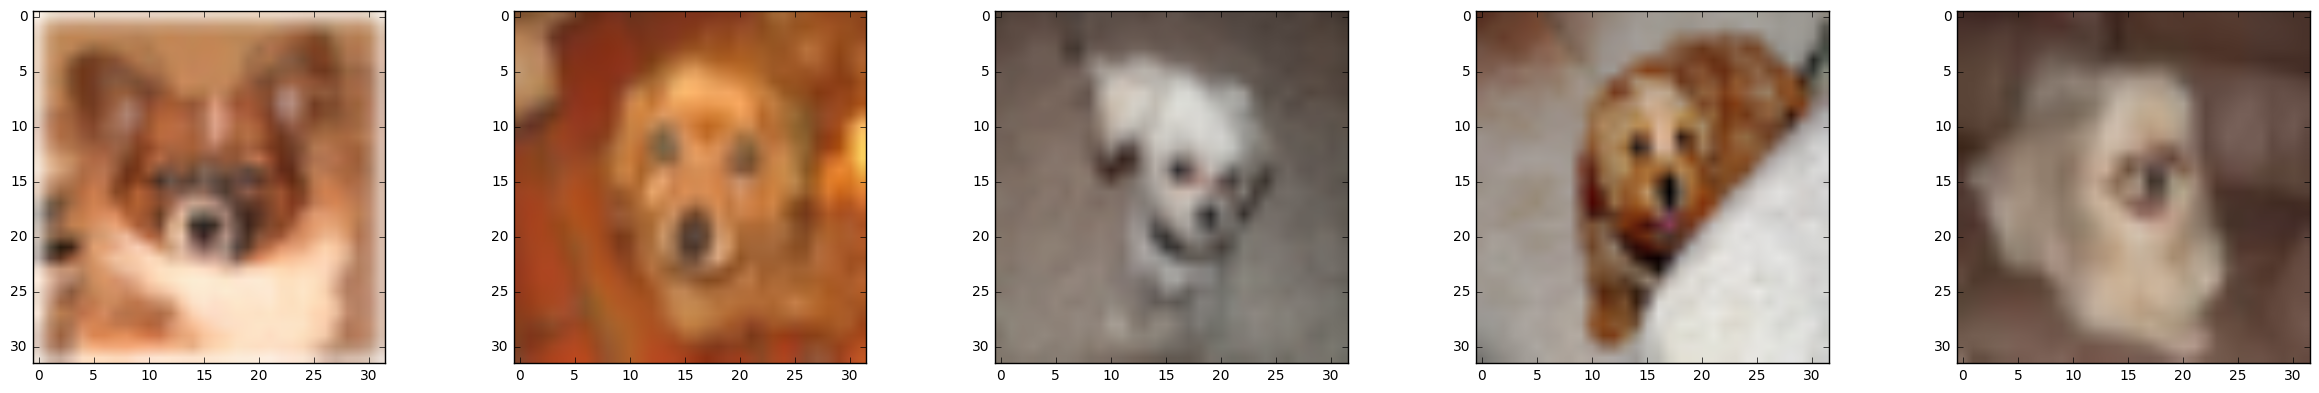

In [48]:
query([testimages[3271]])

Query Image


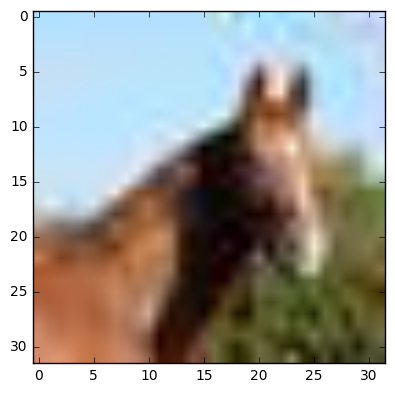

[[ 2.0802341   2.22575434  2.22768957  2.25017973  2.28832276]]
Query Results


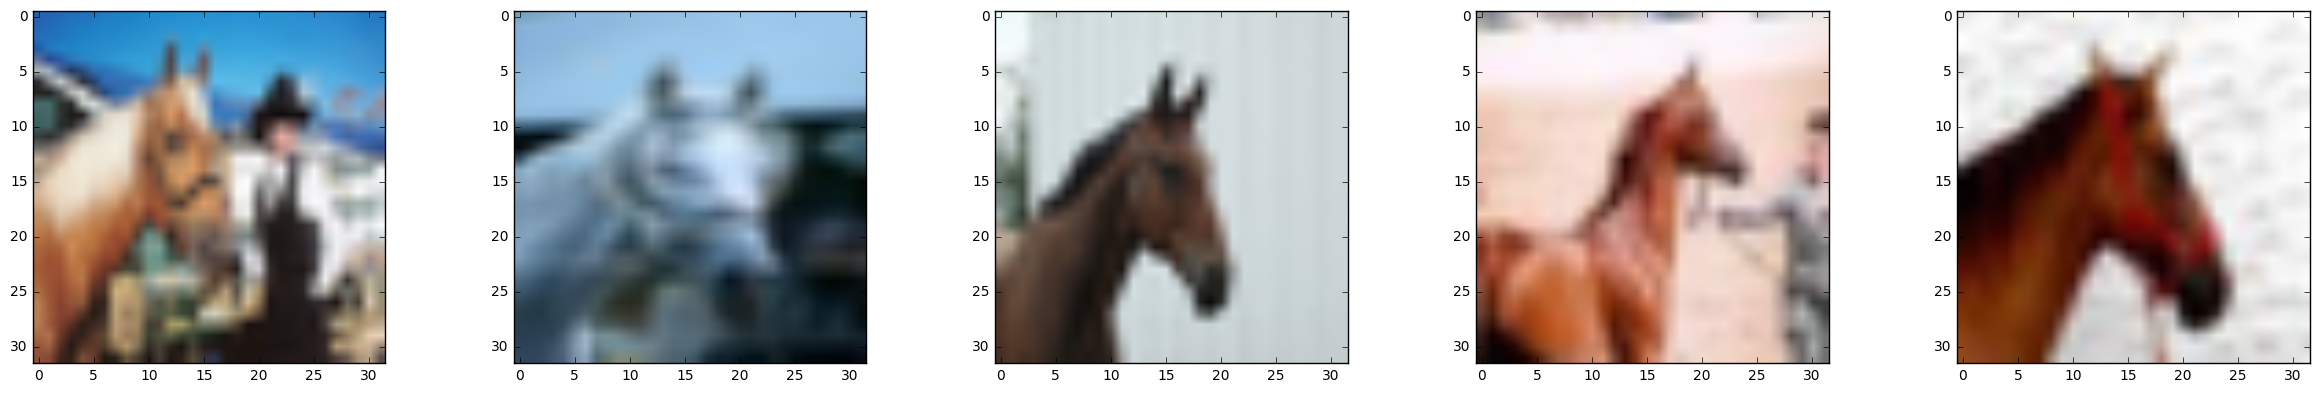

In [40]:
query(getarray("horse.jpg"))